In [1]:
# importing all important modules which we are gonna use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [260]:
#  Utility Functions
# figure number and figure size
fignum = 1
figsize = (6,5)

# for plotting the data points
def plot_data(X, Y, figsize):
    plt.figure(figsize=figsize)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.legend()
    plt.show()

# for plotting the decision boundary
def plot_decision(clf, X, Y, figsize):
    global fignum
    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=figsize)
    plt.clf()
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=70,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors='k')
    plt.axis('tight')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 1000)
    yy = np.linspace(ylim[0], ylim[1], 1000)
    YY, XX = np.meshgrid(yy, xx)
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=figsize)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    fignum = fignum + 1
    plt.show()

# 1) LINEAR DATA

In [214]:
# importing the training data
df=pd.read_csv('data_linear_train.csv')
# showing the top elements of data
df.head()

,x1,x2,y
0,4.489435,5.281626,1.0
1,1.174600,0.300846,0.0
2,0.296359,0.565397,0.0
3,-2.788113,-1.587206,0.0
4,5.187258,4.673348,1.0


In [215]:
# storing class 1 data points in one dataframe
df1=df[df['y']==1.0]
df1.head()

,x1,x2,y
0,4.489435,5.281626,1.0
4,5.187258,4.673348,1.0
5,5.162665,4.274827,1.0
6,5.506976,4.706904,1.0
12,5.131489,3.843291,1.0


In [216]:
# storing class 0 data points in one dataframe
df2=df[df['y']==0.0]
df2.head()

,x1,x2,y
1,1.174600,0.300846,0.0
2,0.296359,0.565397,0.0
3,-2.788113,-1.587206,0.0
7,0.600883,-1.131641,0.0
8,1.042335,-2.104928,0.0


In [217]:
# creating a 2-D array with the data points of class 1
x1_1=np.array(df1['x1'])
x2_1=np.array(df1['x2'])
X1=np.stack((x1_1,x2_1),axis=-1)
X1.shape

(490, 2)

In [218]:
# creating a 2-D array with the data points of class 0
x1_0=np.array(df2['x1'])
x2_0=np.array(df2['x2'])
X2=np.stack((x1_0,x2_0),axis=-1)
X2.shape

(490, 2)

In [219]:
# concatenating both the arrays to make the X_train
X=np.concatenate((X1,X2),axis=0)
X.shape

(980, 2)

In [220]:
# making Y_train by adding the labels of class 1 and class 0
Y=df1['y'].append(df2['y'])
Y.shape

(980,)

<b>Plot the datapoints in a 2D plot with different colors for the two classes.</b>

AttributeError: 'PathCollection' object has no property 'labels'

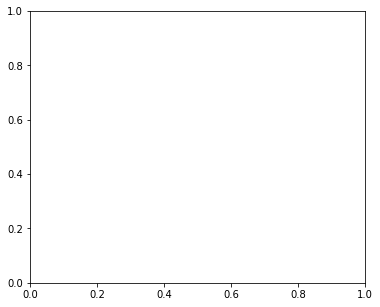

In [261]:
# plotting the data points using plot_Data function
plot_data(X,Y,figsize)

<b>Print which kernel type is the best for this dataset.</b>

In [222]:
print('Linear kernel is best for this dataset')

Linear kernel is best for this dataset


<b>Print the values for the best hyperparameters that you have selected depending on the kernel type.<b/>

In [223]:
# creating range for C
C= [1e-2, 1e-1, 1, 1e1, 1e2,1e3,1e4]

# creating range for gamma
gamma= [1e-2,1e-1, 1, 1e1,1e2,1e3]

# creating the dict for parameters
params = dict(gamma=gamma, C=C)

# using grid serch cross validation technique for finding the best hyperparameters
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(kernel='linear'), param_grid=params, cv=cv)
grid.fit(X, Y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.01, 'gamma': 0.01} with a score of 1.00


<b>Plot the decision region plots learnt by the classifier (plots must have train data superimposed in the figure).</b> 

<ipython-input-213-e55ddd49bc26>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


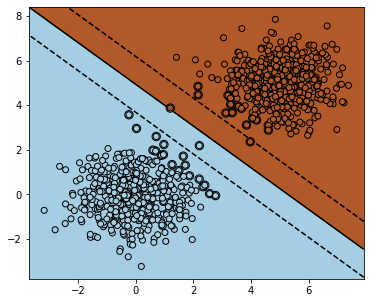

In [224]:
# creating the model
model=SVC(kernel='linear',gamma=0.01,C=0.01)

# fitting the model
model.fit(X,Y)

# plotting the decision boundary
plot_decision(model,X,Y,figsize)

<b>Predict the labels Y for the datapoints provided in data linear test.csv and store them in a new column named ’predictions’ in this csv file.</b>

In [225]:
# loadind the test data
df_test=pd.read_csv('data_linear_test.csv')

# printing the shape
print(df_test.shape)

df_test.head()

(20, 2)


,x1,x2
0,-2.794472,-1.039104
1,5.186285,4.618729
2,-2.123100,1.039727
3,-0.269293,-0.110851
4,5.342423,6.242017


In [226]:
# storing elements of column x1 in an array
x1_test=np.array(df_test['x1'])

# storing element sof column x2 in an array
x2_test=np.array(df_test['x2'])

# creating a 2-D array with data points of arrays created above
X_test=np.stack((x1_test,x2_test),axis=-1)


In [227]:
# predicting the y labels for test data
y_predicted=model.predict(X_test)

y_predicted

array([0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1.])

In [228]:
# creating a new column of predictions
df_test['predictions']=y_predicted
df_test.head()

,x1,x2,predictions
0,-2.794472,-1.039104,0.0
1,5.186285,4.618729,1.0
2,-2.123100,1.039727,0.0
3,-0.269293,-0.110851,0.0
4,5.342423,6.242017,1.0


In [255]:
# saving the dataframe with predicted values in a csv file
df_test.to_csv('Abhichal_Rajput_test1.csv', index=False)

<b>Print the confusion matrix, accuracy scores for both the training and the test datapoints given in the two csv files.</b>

In [230]:
print("Accuracy Score Train: ",accuracy_score(Y, model.predict(X)))

Accuracy Score Train:  1.0


In [231]:
print("Confusion Matrix Train: ")
print(confusion_matrix(Y, model.predict(X)))

Confusion Matrix Train: 
[[490   0]
 [  0 490]]


In [232]:
print("Accuracy Score Test")
#print(accuracy_score(Y_test, model.predict(X_test)))

Accuracy Score Test


In [233]:
print("Confusion Matrix Test")
#print(confusion_matrix(Y_test,model.predict(X_test)))

Confusion Matrix Test


# 2) NON LINEAR DATA

In [234]:
# loading the non linear data in the dataframe
data=pd.read_csv('data_nonlinear_train.csv')

# printing the shape
print(data.shape)

# showing top 5 elements
data.head()

(980, 3)


,x1,x2,y
0,2.468905,-2.687452,1.0
1,-3.432486,0.644840,1.0
2,2.757928,-0.966273,1.0
3,6.041461,2.322639,1.0
4,-0.239617,-1.355691,1.0


In [235]:
# storing class 1 data points in one dataframe
data1=data[data['y']==1.0]
data1.head()

,x1,x2,y
0,2.468905,-2.687452,1.0
1,-3.432486,0.644840,1.0
2,2.757928,-0.966273,1.0
3,6.041461,2.322639,1.0
4,-0.239617,-1.355691,1.0


In [236]:
# storing class 0 data points in one dataframe
data2=data[data['y']==0.0]
data2.head()

,x1,x2,y
25,-4.767321,4.100919,0.0
26,1.295092,0.566341,0.0
27,-1.975888,-2.461491,0.0
28,-1.042730,2.278293,0.0
29,4.718130,0.130971,0.0


In [237]:
# creating a 2-D array with the data points of class 1
n_x1_1=np.array(data1['x1'])
n_x2_1=np.array(data1['x2'])
n_X1=np.stack((n_x1_1,n_x2_1),axis=-1)
n_X1.shape

(494, 2)

In [238]:
# creating a 2-D array with the data points of class 0
n_x1_0=np.array(data2['x1'])
n_x2_0=np.array(data2['x2'])
n_X2=np.stack((n_x1_0,n_x2_0),axis=-1)
n_X2.shape

(486, 2)

In [239]:
# concatenating both the arrays to make the X_train
n_X=np.concatenate((n_X1,n_X2),axis=0)
n_X.shape

(980, 2)

In [240]:
# making Y_train by adding the labels of class 1 and class 0
n_Y=data1['y'].append(data2['y'])
n_Y.shape

(980,)

<b>Plot the datapoints in a 2D plot with different colors for the two classes.</b>

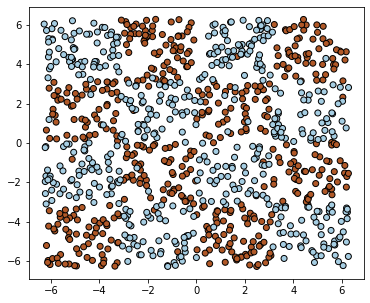

In [241]:
# plotting the data points using plot_Data function
plot_data(n_X,n_Y,figsize)

<b>Print which kernel type is the best for this dataset.</b>

In [242]:
print('The kernel type which is best suited for this is Gaussian kernel or Radial basis function kernel')

The kernel type which is best suited for this is Gaussian kernel or Radial basis function kernel


<b> Print the values for the best hyperparameters that you have selected depending on the kernel type.</b>

In [243]:
# creating the range for C
C= [1e-2, 1e-1, 1, 1e1, 1e2,1e3,1e4]

# creating the range for gamma
gamma= [1e-2,1e-1, 1, 1e1,1e2,1e3]

# creating dict for parameters
params = dict(gamma=gamma, C=C)

# using grid serch cross validation technique for finding the best hyperparameters
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=params, cv=cv)
grid.fit(n_X, n_Y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1000.0, 'gamma': 0.1} with a score of 0.92


<b>Plot the decision region plots learnt by the classifier (plots must have train data superimposed in the figure).</b>

<ipython-input-213-e55ddd49bc26>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)


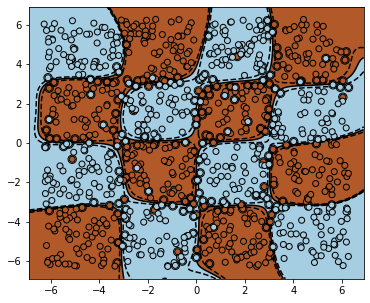

In [244]:
# creating the model
n_model=SVC(kernel='rbf',gamma=0.1,C=1000)

# fitting the model
n_model.fit(n_X,n_Y)

# plotting the decision boundary
plot_decision(n_model,n_X,n_Y,figsize)

<b>Predict the labels Y for the datapoints provided in data non linear test.csv and store them in a new column named ’predictions’ in this csv file.</b>

In [245]:
# loading the test data
data_test=pd.read_csv('data_nonlinear_test.csv')

# printing the shape
data_test.head()

,x1,x2
0,-6.249406,6.136730
1,5.093672,-3.673956
2,-2.607655,0.251455
3,5.050567,6.077485
4,-3.046816,0.808760


In [246]:
# storing elements of column x1 in an array
n_x1_test=np.array(data_test['x1'])

# storing elements of column x2 in an array
n_x2_test=np.array(data_test['x2'])

# creating a 2-D array with data points of arrays created above
n_X_test=np.stack((n_x1_test,n_x2_test),axis=-1)

In [247]:
# predicting labels for test data
n_y_predicted=n_model.predict(n_X_test)
n_y_predicted

array([0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0.])

In [248]:
# adding the prediction column to the dataframe
data_test['predictions']=n_y_predicted

In [254]:
# storing the dataframe in a csv file
data_test.to_csv('Abhichal_Rajput_test2.csv',index=False)

<b>Print the confusion matrix, accuracy scores for both the training and the test datapoints given in the two csv files.</b>

In [250]:
print("Accuracy Scores Train: ",accuracy_score(n_Y, n_model.predict(n_X)))

Accuracy Scores Train:  0.9387755102040817


In [251]:
print("Confusion Matrix Train")
print(confusion_matrix(n_Y, n_model.predict(n_X)))

Confusion Matrix Train
[[455  31]
 [ 29 465]]


In [252]:
print("Accuracy Score Test:")
#print(accuracy_score(Y_test, n_model.predict(n_X_test)))

Accuracy Score Test:


In [253]:
print("Confusion Matrix Test")
#print(confusion_matrix(Y_test, n_model.predict(n_X_test)))

Confusion Matrix Test
